**Instruções:**  

- Justifique seu raciocínio e escreva respostas completas. Os resultados de questões anteriores podem ser usados nas questões seguintes. 

- Explique seu código e comente os gráficos: um gráfico sem referência no texto está “perdido”.

## Matrizes Gausianas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv

### Item A

In [3]:
n = 100

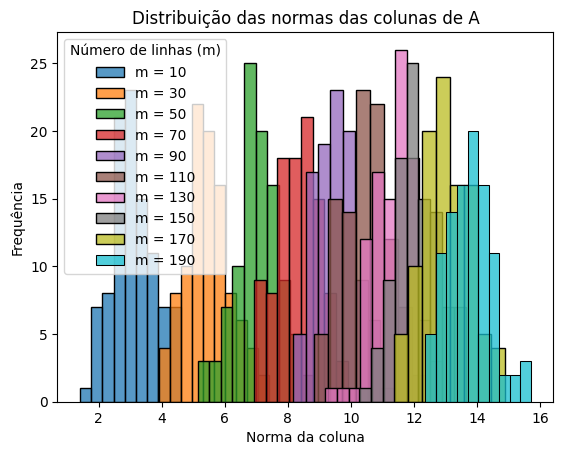

In [4]:
for m in range(10, 200, 20):
    A = np.random.normal(0, 1, size=(m, n))
    norm_list = [np.linalg.norm(A[:, i]) for i in range(n)]
    sns.histplot(norm_list, label=f"m = {m}", legend=True)


plt.legend(title="Número de linhas (m)")
plt.xlabel("Norma da coluna")
plt.ylabel("Frequência")
plt.title("Distribuição das normas das colunas de A")
plt.show()


É possível notar uma distribuição aparentemente normal entre a norma das colunas de uma matriz $A$, e também, percebe-se que o valor das normas aumenta conforme o $m$ aumenta, e a razão para isso na realidade é bem simples: quanto maior o $m$, ou seja, quanto mais linhas a matriz possue, maior será o tamanho do vetor, então os vetores da matriz terão mais elementos e por tanto a norma irá crescer. Quanto a distribuição, sabemos que a soma de váriaveis aleatórias normais é também uma normal com média igual a soma das médias e desvio padrão igual a soma dos quadrados dos desvios padrões. Como a norma dois é nesse caso, a raiz da soma dos quadrados de variáveis com distribuição normal, então a norma também será dada por uma distribuição normal.

### Item B

In [5]:
m = 100

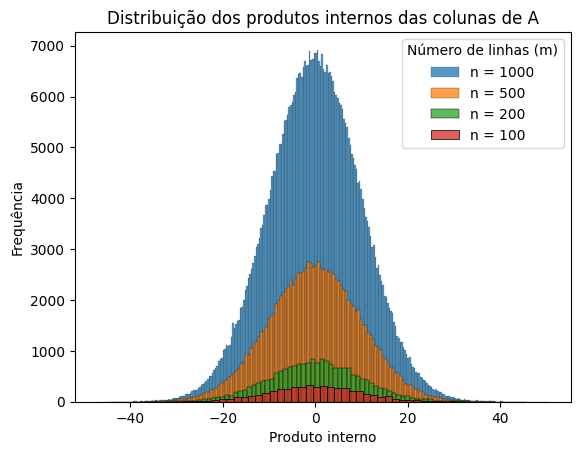

In [6]:
for n in [1000, 500, 200, 100]:
    A = np.random.normal(0, 1, size=(m, n))
    inner_list = [np.inner(A[:, i], A[:, j]) for i in range(n) for j in range(i+1, n)]
    sns.histplot(inner_list, label=f"n = {n}", legend=True)


plt.legend(title="Número de linhas (m)")
plt.xlabel("Produto interno")
plt.ylabel("Frequência")
plt.title("Distribuição dos produtos internos das colunas de A")
plt.show()


Conforme aumentamos o número de linhas, nota-se uma concentração dos resultados em volta da média da distribuição, que continua sendo 0. Mas também é interessante notar que a distribuição continua sendo normal independente do tamanho e a média continua sendo 0, e portanto, quando $n\to \infty$, a distribuição continua sendo normal com média $\mu = 0$.

### Item C

In [7]:
A_list = [np.random.normal(0, 1, (100, 300)) for i in range(1000)]
k_list = []

In [8]:
for A in A_list:
    max_k = 0
    for coluna1 in range(300):
        for coluna2 in range(coluna1+1, 300):
            k = abs(np.inner(A[:, coluna1], A[:, coluna2]))/(np.linalg.norm(A[:, coluna1])*np.linalg.norm(A[:, coluna2]))
            if  k > max_k:
                max_k = k
    k_list.append(max_k)


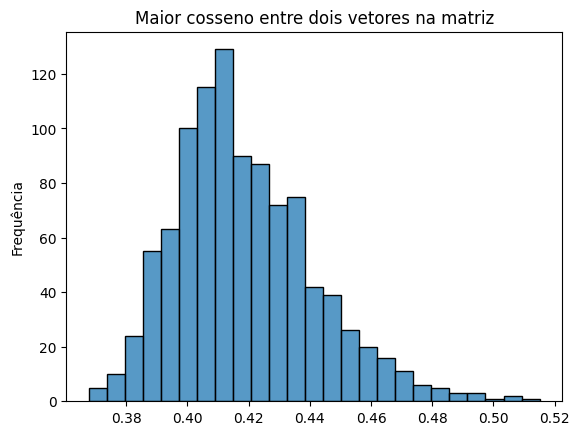

In [9]:
sns.histplot(k_list)
plt.ylabel("Frequência")
plt.title("Maior cosseno entre dois vetores na matriz")
plt.show()

Vamos abordar esse problema por uma ótica geométrica. O que estamos calculando é basicamente o valor absoluto do cosseno entre os vetores. Quando esse valor se aproxima de 0 quer dizer que os vetores são ortogonais. Como nós estamos vendo o maior valor que esse número assume para cada matriz, estamos vendo o quão "não ortogonal" são os dois vetores menos ortogonais dessa matriz. Pelo histograma, visualizamos que, na maioria das matrizes, esse valor gira em torno de 0.38 e 0.45.